## The time series is downloaded from TSDL.
## https://datamarket.com/data/set/22mh/monthly-sales-for-a-souvenir-shop-on-the-wharf-at-a-beach-resort-town-in-queensland-australia-jan-1987-dec-1993#!ds=22mh&display=line

In [1]:
SUV<-read.csv('monthly-sales-for-a-souvenir-sho.csv')
suv<-ts(SUV$Sales)

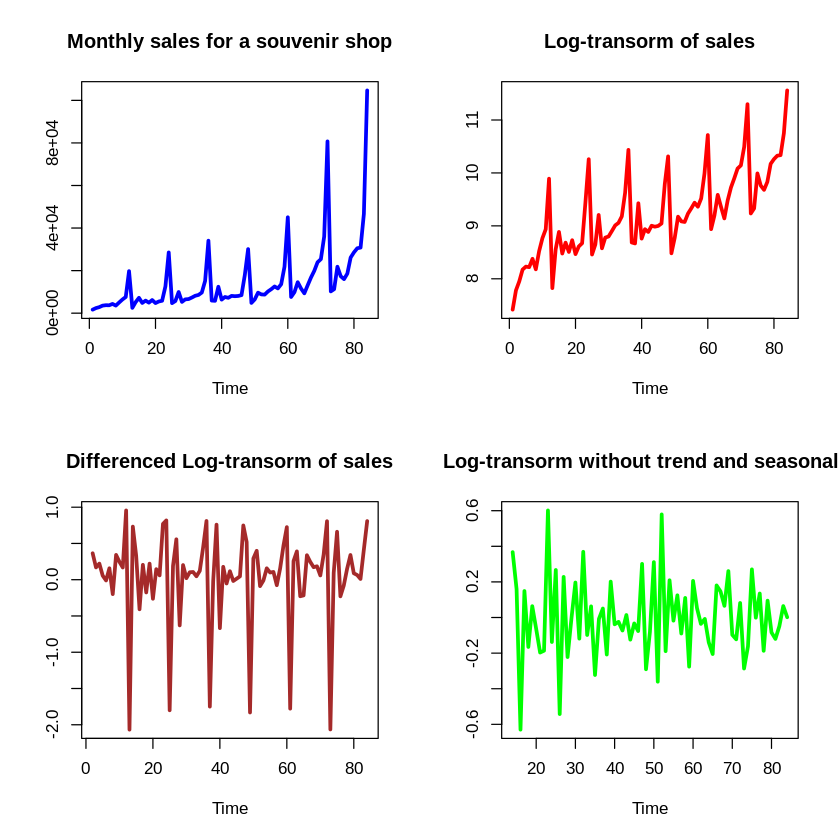

In [3]:
library(astsa)
library(forecast)



par(mfrow=c(2,2))

plot(suv, main='Monthly sales for a souvenir shop', ylab='', col='blue', lwd=3)
plot(log(suv), main='Log-transorm of sales', ylab='', col='red', lwd=3)
plot(diff(log(suv)), main='Differenced Log-transorm of sales', ylab='', col='brown', lwd=3)
plot(diff(diff(log(suv)),12), main='Log-transorm without trend and seasonaliy', ylab='', col='green', lwd=3)

ACF,PACF
-0.46,-0.46
0.19,-0.02
-0.17,-0.11
-0.06,-0.23
0.01,-0.13
0.00,-0.07
-0.07,-0.20
0.07,-0.12
0.09,0.11
0.02,0.11


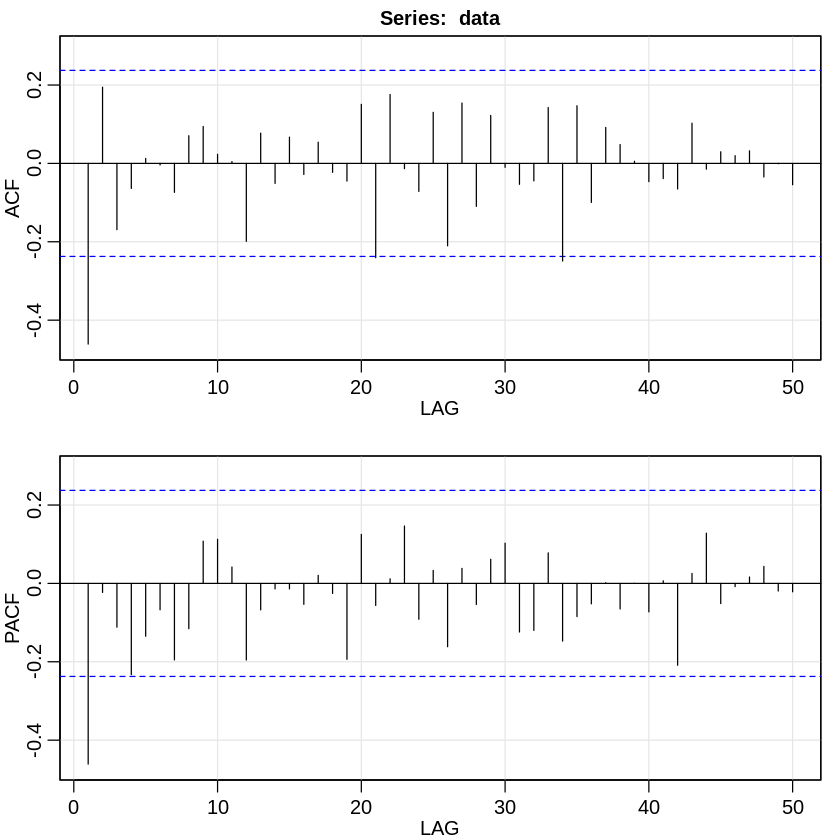

In [4]:
data<-diff(diff((log(suv)),12))
acf2(data, 50)

In [5]:
d=1
DD=1
per=12
for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:4){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(suv), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 1 0 0 1 0 12 AIC= -11.60664  SSE= 3.432906  p-VALUE= 0.0001365566 
0 1 0 0 1 1 12 AIC= -16.09179  SSE= 2.97756  p-VALUE= 3.149952e-05 
0 1 0 0 1 2 12 AIC= -17.58234  SSE= 2.301963  p-VALUE= 0.0002456591 
0 1 0 0 1 3 12 AIC= -16.41016  SSE= 2.35266  p-VALUE= 0.0003392283 
0 1 0 1 1 0 12 AIC= -13.43083  SSE= 3.214065  p-VALUE= 4.083839e-05 
0 1 0 1 1 1 12 AIC= -17.76362  SSE= 2.399746  p-VALUE= 0.0001916565 
0 1 0 1 1 2 12 AIC= -15.99095  SSE= 2.349898  p-VALUE= 0.0002477783 
0 1 0 1 1 3 12 AIC= -14.74777  SSE= 2.302026  p-VALUE= 0.0004504596 
0 1 1 0 1 0 12 AIC= -27.78538  SSE= 2.643277  p-VALUE= 0.1742478 
0 1 1 0 1 1 12 AIC= -34.54538  SSE= 2.233424  p-VALUE= 0.2730783 
0 1 1 0 1 2 12 AIC= -33.6145  SSE= 2.109473  p-VALUE= 0.2830597 
0 1 1 0 1 3 12 AIC= -32.19273  SSE= 1.87789  p-VALUE= 0.270042 
0 1 1 1 1 0 12 AIC= -32.33192  SSE= 2.360507  p-VALUE= 0.2584529 
0 1 1 1 1 1 12 AIC= -34.0881  SSE= 1.842013  p-VALUE= 0.2843225 
0 1 1 1 1 2 12 AIC= -32.1017  SSE= 1.856343  p-VALUE= 0.28

In [ ]:
model<- arima(x=log(suv), order = c(1,1,0), seasonal = list(order=c(0,1,1), period=12))

plot(forecast(model))

In [6]:
forecast(model)

    Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
 85       9.602243  9.383892  9.820594  9.268304  9.936182
 86       9.805489  9.565354 10.045623  9.438235 10.172742
 87      10.345190 10.094148 10.596233  9.961254 10.729127
 88      10.106830  9.846979 10.366681  9.709423 10.504238
 89      10.097596  9.829570 10.365621  9.687686 10.507506
 90      10.195186  9.919304 10.471069  9.773260 10.617113
 91      10.447236 10.163731 10.730742 10.013652 10.880821
 92      10.476931 10.186006 10.767856 10.031999 10.921863
 93      10.574661 10.276500 10.872821 10.118663 11.030658
 94      10.641897 10.336668 10.947126 10.175089 11.108705
 95      11.078483 10.766326 11.390641 10.601080 11.555887
 96      11.877731 11.558727 12.196735 11.389857 12.365605
 97       9.946979  9.581490 10.312468  9.388012 10.505946
 98      10.188995  9.805683 10.572306  9.602770 10.775219
 99      10.679720 10.283097 11.076344 10.073138 11.286303
100      10.437504 10.028766 10.846242  9.812393 11.0626

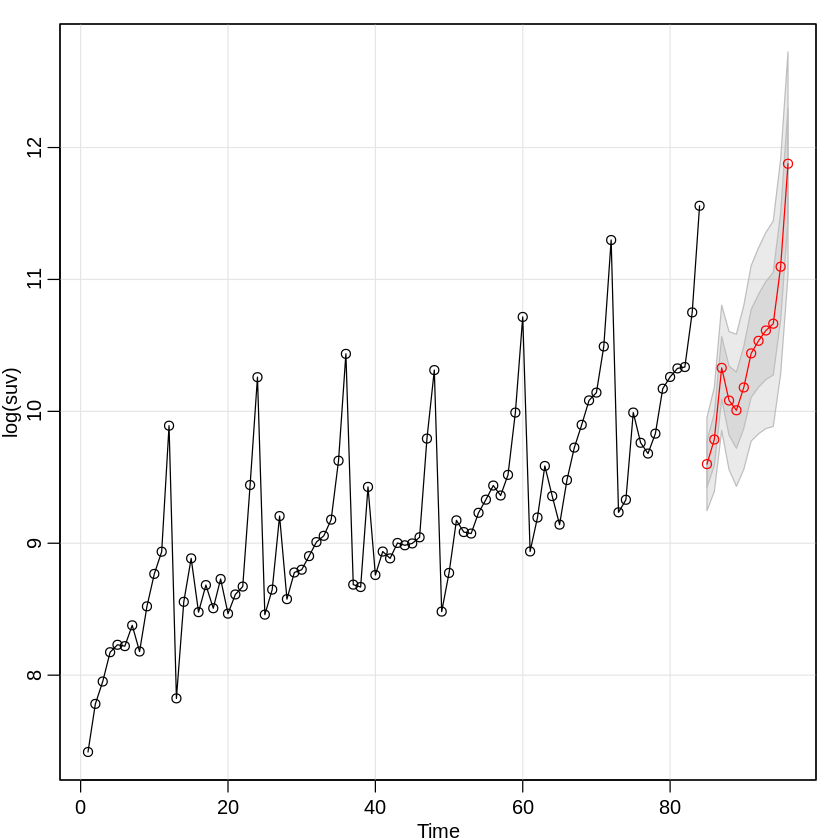

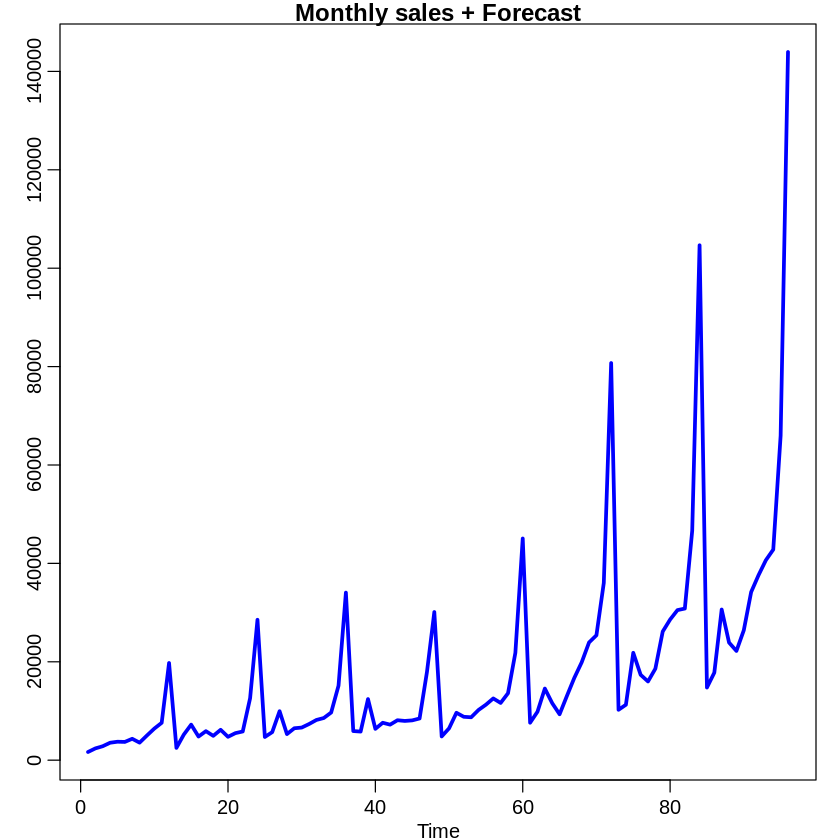

In [7]:
a<-sarima.for(log(suv),12,1,1,0,0,1,1,12)

plot.ts(c(suv,exp(a$pred)), main='Monthly sales + Forecast', ylab='', col='blue', lwd=3)